In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time


In [3]:
%matplotlib widget

In [4]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [5]:
##Force Calibration with single freq, with xyz2

In [6]:
Year = "2020"
Month = "02"
Day = "26"
BeadNumber =1
folder = r"/data/new_trap/"+ Year + Month + Day

In [64]:
ResX=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=48+i
    SigFreq=71
    fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResX[i]=np.sqrt(xpsd[SigFreq*10])
    print(np.sqrt(xpsd[SigFreq*10]))
    #print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

0.0025841855176935366
0.0026125682248631997
0.0025970482073981887
0.0025621275198540188
0.0025773521291589958


In [65]:
ResY=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=53+i
    SigFreq=71
    fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResY[i]=np.sqrt(ypsd[SigFreq*10])    
    #print(np.sqrt(xpsd[SigFreq*10]))
    print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

0.002782461106978532
0.002789036912652608
0.0027956756406935295
0.0028095641275829816
0.002780630024615909


In [66]:
ResZ=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=43+i
    fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResZ[i]=np.sqrt(zpsd[SigFreq*10])    
    print(np.sqrt(zpsd[SigFreq*10]))
    

8186.227482159913
8482.25639375313
8660.116084399317
8591.193512133503
8757.774723993125


In [67]:
q=13
V=10
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)*np.sqrt(5)
print(F)

7.039402001073699e-15


In [10]:
AveX=np.average(ResX)
AveY=np.average(ResY)
AveZ=np.average(ResZ)
BtoFx=F/AveX
BtoFy=F/AveY
BtoFz=F/AveZ
print(BtoFx)
print(BtoFy)
print(BtoFz)

2.721429185318069e-12
2.5217512698767742e-12
8.247192024475596e-19


In [11]:
##code for Transfer Function

In [18]:
##X preparation
NdataX=2
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_X_%d.h5" % NdataX
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)
fbase=7

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0X=np.sqrt(xpsd[fbase*10])
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data


In [19]:
##Y preparataion
NdataY=2
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Y_%d.h5" % NdataY
BDF = BeadDataFile.BeadDataFile(fname) 
data = BDF.xyz2 
res=50000 
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none) 
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none) 
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none) 
Noise0Y=np.sqrt(ypsd[fbase*10]) 
YnoiseX=np.sqrt(xpsd) 
YnoiseY=np.sqrt(ypsd) 
YnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data


In [20]:
##Z preparation
NdataZ=2
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Z_%d.h5" % NdataZ
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0Z=np.sqrt(zpsd[fbase*10])
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data


In [21]:
#Here, there is no conversion factor
q=13
V=0.65
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
Nharm=100

FnoiseXX=XnoiseX
FnoiseXY=XnoiseY
FnoiseXZ=XnoiseZ
FnoiseYX=YnoiseX
FnoiseYY=YnoiseY
FnoiseYZ=YnoiseZ
FnoiseZX=ZnoiseX
FnoiseZY=ZnoiseY
FnoiseZZ=ZnoiseZ

TFXX=np.zeros(Nharm)
TFXY=np.zeros(Nharm)
TFXZ=np.zeros(Nharm)
TFYX=np.zeros(Nharm)
TFYY=np.zeros(Nharm)
TFYZ=np.zeros(Nharm)
TFZX=np.zeros(Nharm)
TFZY=np.zeros(Nharm)
TFZZ=np.zeros(Nharm)

FreqTF=np.zeros(Nharm)
for i in range(Nharm):
    FreqTF[i]=fbase*(i+1)
    TFXX[i]=FnoiseXX[fbase*10*(i+1)]
    TFXY[i]=FnoiseXY[fbase*10*(i+1)]
    TFXZ[i]=FnoiseXZ[fbase*10*(i+1)]
    TFYX[i]=FnoiseYX[fbase*10*(i+1)]
    TFYY[i]=FnoiseYY[fbase*10*(i+1)]
    TFYZ[i]=FnoiseYZ[fbase*10*(i+1)]
    TFZX[i]=FnoiseZX[fbase*10*(i+1)]
    TFZY[i]=FnoiseZY[fbase*10*(i+1)]
    TFZZ[i]=FnoiseZZ[fbase*10*(i+1)]

In [17]:
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TFBead%d%d%d_Bit.txt" % (NdataX,NdataY,NdataZ)

f1 = open(ofname,"a")
for i in range(Nharm):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [ ]:
## Plotting the force sensitivity with transfer function compensation

In [45]:
Ndata=36
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)

w0x=317.563
gx=49.7496
w0y=291.204
gy=27.2847
w0z=300.189
gz=271.367

f0=71
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

/data/new_trap/20200226/Bead1/InitialTest/Data36.h5
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


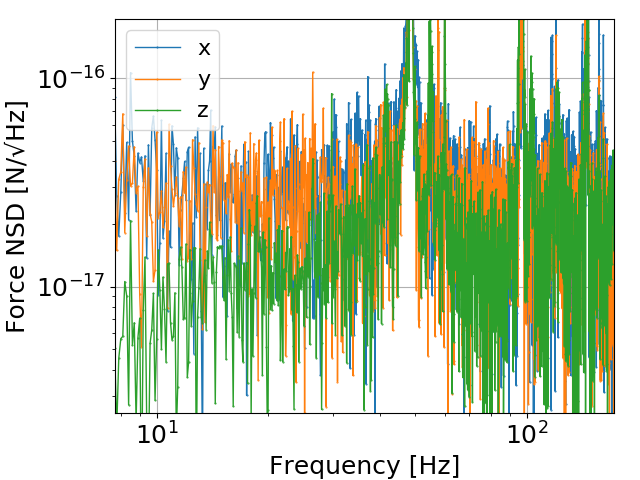

In [41]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, ynsd, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(freqs, znsd, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(0.1,500)
plt.ylim(1e-18,1e-14)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivity%d.png" % Ndata

plt.savefig(ofname,dpi=300)

In [32]:
## 1-100 Hz Transfer Function Test

In [68]:
##X preparation
NdataX=7
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_X_%d.h5" % NdataX
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
tInt=100
Nharm=100
fsamp=5000
res=fsamp*tInt
fBase=1;

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)
XrespX=np.zeros(Nharm)
XrespY=np.zeros(Nharm)
XrespZ=np.zeros(Nharm)
for i in range (Nharm):
    XrespX[i]=XnoiseX[tInt*(i+1)]
    XrespY[i]=XnoiseY[tInt*(i+1)]
    XrespZ[i]=XnoiseZ[tInt*(i+1)]
    
XtfX=np.zeros(991)
XtfY=np.zeros(991)
XtfZ=np.zeros(991)

for i in range (99):
    for j in range(10):
        XtfX[i*10+j]=0.1*XrespX[i]*(10-j)+0.1*XrespX[i+1]*j
        XtfY[i*10+j]=0.1*XrespY[i]*(10-j)+0.1*XrespY[i+1]*j
        XtfZ[i*10+j]=0.1*XrespZ[i]*(10-j)+0.1*XrespZ[i+1]*j
XtfX[990]=XrespX[99]
XtfY[990]=XrespY[99]
XtfZ[990]=XrespZ[99]

/data/new_trap/20200226/Bead1/TransFunc/TransFunc_X_7.h5
No height data
No cantilever data
Error loading spinning data


In [69]:
##Y preparation
NdataY=7
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Y_%d.h5" % NdataY
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
YnoiseX=np.sqrt(xpsd)
YnoiseY=np.sqrt(ypsd)
YnoiseZ=np.sqrt(zpsd)
YrespX=np.zeros(Nharm)
YrespY=np.zeros(Nharm)
YrespZ=np.zeros(Nharm)
for i in range (Nharm):
    YrespX[i]=YnoiseX[tInt*(i+1)]
    YrespY[i]=YnoiseY[tInt*(i+1)]
    YrespZ[i]=YnoiseZ[tInt*(i+1)]
    
YtfX=np.zeros(991)
YtfY=np.zeros(991)
YtfZ=np.zeros(991)

for i in range (99):
    for j in range(10):
        YtfX[i*10+j]=0.1*YrespX[i]*(10-j)+0.1*YrespX[i+1]*j
        YtfY[i*10+j]=0.1*YrespY[i]*(10-j)+0.1*YrespY[i+1]*j
        YtfZ[i*10+j]=0.1*YrespZ[i]*(10-j)+0.1*YrespZ[i+1]*j
YtfX[990]=YrespX[99]
YtfY[990]=YrespY[99]
YtfZ[990]=YrespZ[99]

/data/new_trap/20200226/Bead1/TransFunc/TransFunc_Y_7.h5
No height data
No cantilever data
Error loading spinning data


In [70]:
##Z preparation
NdataZ=7
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Z_%d.h5" % NdataZ
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)
ZrespX=np.zeros(Nharm)
ZrespY=np.zeros(Nharm)
ZrespZ=np.zeros(Nharm)
for i in range (Nharm):
    ZrespX[i]=ZnoiseX[tInt*(i+1)]
    ZrespY[i]=ZnoiseY[tInt*(i+1)]
    ZrespZ[i]=ZnoiseZ[tInt*(i+1)]
    
ZtfX=np.zeros(991)
ZtfY=np.zeros(991)
ZtfZ=np.zeros(991)

for i in range (99):
    for j in range(10):
        ZtfX[i*10+j]=0.1*ZrespX[i]*(10-j)+0.1*ZrespX[i+1]*j
        ZtfY[i*10+j]=0.1*ZrespY[i]*(10-j)+0.1*ZrespY[i+1]*j
        ZtfZ[i*10+j]=0.1*ZrespZ[i]*(10-j)+0.1*ZrespZ[i+1]*j
ZtfX[990]=ZrespX[99]
ZtfY[990]=ZrespY[99]
ZtfZ[990]=ZrespZ[99]

/data/new_trap/20200226/Bead1/TransFunc/TransFunc_Z_7.h5
No height data
No cantilever data
Error loading spinning data


In [32]:
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TFintBit%d%d%d.txt" % (NdataX,NdataY,NdataZ)

f1 = open(ofname,"a")
for i in range(991):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % ((0.1*(i+10)),XtfX[i],XtfY[i],XtfZ[i],YtfX[i],YtfY[i],YtfZ[i],ZtfX[i],ZtfY[i],ZtfZ[i]))

#    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
#                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [33]:
##force sensitivity

In [34]:
Ndata=36
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
xnsd=np.sqrt(xpsd)
ynsd=np.sqrt(ypsd)
znsd=np.sqrt(zpsd)
f0=71
Xsens=np.zeros(991)
Ysens=np.zeros(991)
Zsens=np.zeros(991)

for i in range(991):
    Xsens[i]=xnsd[10+i]*XtfX[f0*10-10]/XtfX[i]*BtoFx
    Ysens[i]=ynsd[10+i]*YtfY[f0*10-10]/YtfY[i]*BtoFy
    Zsens[i]=znsd[10+i]*ZtfZ[f0*10-10]/ZtfZ[i]*BtoFz

/data/new_trap/20200226/Bead1/InitialTest/Data36.h5
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


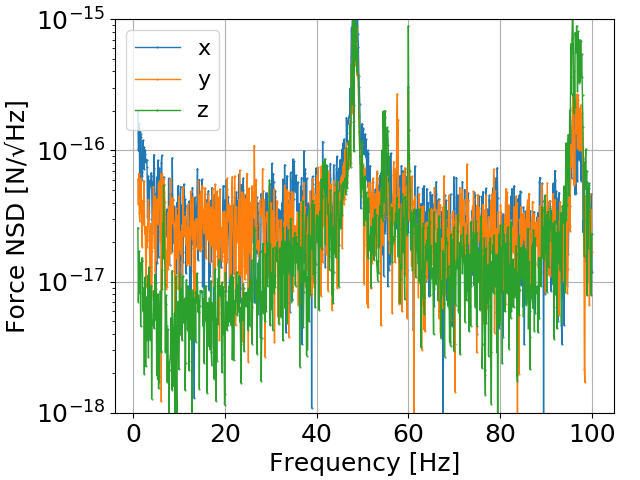

In [38]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.semilogy(np.linspace(1,100,991),Xsens, '.-', label="x",markersize=1,linewidth=1)
ax.semilogy(np.linspace(1,100,991),Ysens, '.-', label="y",markersize=1,linewidth=1)
ax.semilogy(np.linspace(1,100,991),Zsens, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
#plt.xlim(1,100)
plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivity1-100HzSemi_%d.png" % Ndata

plt.savefig(ofname,dpi=300)

In [ ]:
## extract the phase information of the transfer function. 

In [29]:
##X preparation
NdataX=11
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_X_%d.h5" % NdataX
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
tInt=10
fsamp=5000
res=tInt*fsamp
fBase=1


data_det=signal.detrend(data)
x_1000=data_det[0]
y_1000=data_det[1]
z_1000=data_det[2]
freqs=np.linspace(0,2500,(25000)+1)
    
xFFT=np.fft.rfft(x_1000)
yFFT=np.fft.rfft(y_1000)
zFFT=np.fft.rfft(z_1000)
norm = np.sqrt(2 / (res* fsamp))
xpsd = norm**2 * (xFFT * xFFT.conj()).real
ypsd = norm**2 * (yFFT * yFFT.conj()).real
zpsd = norm**2 * (zFFT * zFFT.conj()).real
XphaseX=np.angle(xFFT)
XphaseY=np.angle(yFFT)
XphaseZ=np.angle(zFFT)

XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data
No laser power data


In [30]:
##Y preparataion
NdataY=11
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Y_%d.h5" % NdataY

BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2 
data_det=signal.detrend(data)
x_1000=data_det[0]
y_1000=data_det[1]
z_1000=data_det[2]
freqs=np.linspace(0,2500,(25000)+1)
    
xFFT=np.fft.rfft(x_1000)
yFFT=np.fft.rfft(y_1000)
zFFT=np.fft.rfft(z_1000)
norm = np.sqrt(2 / (res* fsamp))
xpsd = norm**2 * (xFFT * xFFT.conj()).real
ypsd = norm**2 * (yFFT * yFFT.conj()).real
zpsd = norm**2 * (zFFT * zFFT.conj()).real
YphaseX=np.angle(xFFT)
YphaseY=np.angle(yFFT)
YphaseZ=np.angle(zFFT)

YnoiseX=np.sqrt(xpsd)
YnoiseY=np.sqrt(ypsd)
YnoiseZ=np.sqrt(zpsd)



No height data
No cantilever data
Error loading spinning data
No laser power data


In [44]:
##Z preparataion
NdataZ=11
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Z_%d.h5" % NdataZ

BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2 
data_det=signal.detrend(data)
x_1000=data_det[0]
y_1000=data_det[1]
z_1000=data_det[2]
freqs=np.linspace(0,2500,(25000)+1)
    
xFFT=np.fft.rfft(x_1000)
yFFT=np.fft.rfft(y_1000)
zFFT=np.fft.rfft(z_1000)
norm = np.sqrt(2 / (res* fsamp))
xpsd = norm**2 * (xFFT * xFFT.conj()).real
ypsd = norm**2 * (yFFT * yFFT.conj()).real
zpsd = norm**2 * (zFFT * zFFT.conj()).real
ZphaseX=np.angle(xFFT)
ZphaseY=np.angle(yFFT)
ZphaseZ=np.angle(zFFT)

ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data
No laser power data


In [45]:
xPha=np.zeros(100)
yPha=np.zeros(100)
zPha=np.zeros(100)
xAmp=np.zeros(100)
yAmp=np.zeros(100)
zAmp=np.zeros(100)

In [50]:
for i in range(0,100):
    xPha[i]=XphaseX[(i+1)*tInt*fBase]-(i*i/100-round(i*i/100))*2*3.14159265-np.pi*0.5
    xAmp[i]=XnoiseX[i]
    if(xPha[i]<-3):
        xPha[i]+=2*np.pi
    yPha[i]=YphaseY[(i+1)*tInt*fBase]-(i*i/100-round(i*i/100))*2*3.14159265+np.pi*0.5
    yAmp[i]=YnoiseY[i]
    if(yPha[i]>3):
        yPha[i]-=2*np.pi
    zPha[i]=ZphaseZ[(i+1)*tInt*fBase]-(i*i/100-round(i*i/100))*2*3.14159265+np.pi*0.5
    zAmp[i]=ZnoiseZ[i]

    
for i in range(0,100):  
   if((zPha[i])>4):
        zPha[i]-=2*np.pi
#    elif((zPha[i+1]-zPha[i])<-4):
#        zPha[i+1]+=2*np.pi

        
#for i in range(0,99):  
#    if((zPha[i+1]-zPha[i])>4):
#        zPha[i+1]-=2*np.pi
#    elif((zPha[i+1]-zPha[i])<-4):
#        zPha[i+1]+=2*np.pi
#for i in range(0,99):  
#    if((zPha[i+1]-zPha[i])>4):
#        zPha[i+1]-=2*np.pi
#    elif((zPha[i+1]-zPha[i])<-4):
#        zPha[i+1]+=2*np.pi

In [51]:
freqs=np.linspace(0,2500,(375000)+1)

_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)

#ax.plot(np.linspace(1,100,100),xPha, '.-', label="x",markersize=1,linewidth=1)
#ax.plot(np.linspace(1,100,100),yPha, '.-', label="y",markersize=1,linewidth=1)
ax.plot(np.linspace(1,100,100),zPha, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
#plt.xlim(0.1,500)
#plt.ylim(1e-7,1e-2)
plt.grid(True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [52]:
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFuncPhase_XYZ_11_10s_1Hz.txt"
f1 = open(ofname,"a")
for k in range(0,100):
    f1.write('%d %f %f %f\n' % (k+1, xPha[k], yPha[k], zPha[k]))
f1.close()

In [34]:
##combining the "#analyzing multiple data in single number,"  
##"##for Noise only analysis for sensitivity. Used bin of 3*n+0.7 Hz, Nint=0", and SortDataTo Harmonics

In [42]:
import scipy, sys, time

In [71]:
import time
start_time = time.time()

#DefineParameters
Ndata=3
Dx=385
Fshake=3
DataN=22500
HarmN=20
Noff=3
ArraySize=(DataN,HarmN)
DataSpaceXSigAmp=np.zeros(ArraySize)
DataSpaceYSigAmp=np.zeros(ArraySize)
DataSpaceZSigAmp=np.zeros(ArraySize)
DataSpaceXSigPha=np.zeros(ArraySize)
DataSpaceYSigPha=np.zeros(ArraySize)
DataSpaceZSigPha=np.zeros(ArraySize)

DataSpaceXNoiAmp=np.zeros(ArraySize)
DataSpaceYNoiAmp=np.zeros(ArraySize)
DataSpaceZNoiAmp=np.zeros(ArraySize)
DataSpaceXNoiPha=np.zeros(ArraySize)
DataSpaceYNoiPha=np.zeros(ArraySize)
DataSpaceZNoiPha=np.zeros(ArraySize)

for k in range(0,DataN):
##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(25000)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=71

    xnsd=np.sqrt(xpsd)*BtoFx#*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy#*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz#*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

##save signal bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXSigAmp[k][i-1]=xnsd[Fshake*10*i]/XtfX[Fshake*10*i-10]*XtfX[f0*10-10]
        DataSpaceXSigPha[k][i-1]=np.angle(xFFT[Fshake*10*i]) 
        DataSpaceYSigAmp[k][i-1]=ynsd[Fshake*10*i]/YtfY[Fshake*10*i-10]*YtfY[f0*10-10]
        DataSpaceYSigPha[k][i-1]=np.angle(yFFT[Fshake*10*i]) 
        DataSpaceZSigAmp[k][i-1]=znsd[Fshake*10*i]/ZtfZ[Fshake*10*i-10]*ZtfZ[f0*10-10]
        DataSpaceZSigPha[k][i-1]=np.angle(zFFT[Fshake*10*i]) 
        
##save noise bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXNoiAmp[k][i-1]=xnsd[Fshake*10*i-Noff]/XtfX[Fshake*10*i-10]*XtfX[f0*10-10]
        DataSpaceXNoiPha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoiAmp[k][i-1]=ynsd[Fshake*10*i-Noff]/YtfY[Fshake*10*i-10]*YtfY[f0*10-10]
        DataSpaceYNoiPha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoiAmp[k][i-1]=znsd[Fshake*10*i-Noff]/ZtfZ[Fshake*10*i-10]*ZtfZ[f0*10-10]
        DataSpaceZNoiPha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
    if (k%100)==0:
        print(k)
        
##write the harmonics data
for i in range(1,(HarmN+1)):
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XSignal%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXSigAmp[k][i-1], DataSpaceYSigAmp[k][i-1], DataSpaceZSigAmp[k][i-1], 
                                            DataSpaceXSigPha[k][i-1], DataSpaceYSigPha[k][i-1], DataSpaceZSigPha[k][i-1]))
    f1.close()
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoiAmp[k][i-1], DataSpaceYNoiAmp[k][i-1], DataSpaceZNoiAmp[k][i-1], 
                                            DataSpaceXNoiPha[k][i-1], DataSpaceYNoiPha[k][i-1], DataSpaceZNoiPha[k][i-1]))
    f1.close()
    
print ("Total run time is ", time.time() - start_time, " s")


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [46]:
##Obsolete code from 2/10
import time
start_time = time.time()

#DefineParameters
Nint=0
Ndata=0
Dx=385
Fshake=3
DataN=1000
HarmN=20
Noff=3
ArraySize=(DataN,HarmN)
DataSpaceXSigAmp=np.zeros(ArraySize)
DataSpaceYSigAmp=np.zeros(ArraySize)
DataSpaceZSigAmp=np.zeros(ArraySize)
DataSpaceXSigPha=np.zeros(ArraySize)
DataSpaceYSigPha=np.zeros(ArraySize)
DataSpaceZSigPha=np.zeros(ArraySize)

DataSpaceXNoiAmp=np.zeros(ArraySize)
DataSpaceYNoiAmp=np.zeros(ArraySize)
DataSpaceZNoiAmp=np.zeros(ArraySize)
DataSpaceXNoiPha=np.zeros(ArraySize)
DataSpaceYNoiPha=np.zeros(ArraySize)
DataSpaceZNoiPha=np.zeros(ArraySize)

for k in range(0,DataN):
##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(25000)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

##save signal bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXSigAmp[k][i-1]=xnsd[Fshake*10*i]
        DataSpaceXSigPha[k][i-1]=np.angle(xFFT[Fshake*10*i]) 
        DataSpaceYSigAmp[k][i-1]=ynsd[Fshake*10*i]
        DataSpaceYSigPha[k][i-1]=np.angle(yFFT[Fshake*10*i]) 
        DataSpaceZSigAmp[k][i-1]=znsd[Fshake*10*i]
        DataSpaceZSigPha[k][i-1]=np.angle(zFFT[Fshake*10*i]) 
        
##save noise bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXNoiAmp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoiPha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoiAmp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoiPha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoiAmp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoiPha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
    if (k%100)==0:
        print(k)
        
##write the harmonics data
for i in range(1,(HarmN+1)):
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XSignalOld%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXSigAmp[k][i-1], DataSpaceYSigAmp[k][i-1], DataSpaceZSigAmp[k][i-1], 
                                            DataSpaceXSigPha[k][i-1], DataSpaceYSigPha[k][i-1], DataSpaceZSigPha[k][i-1]))
    f1.close()
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoiseOld%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoiAmp[k][i-1], DataSpaceYNoiAmp[k][i-1], DataSpaceZNoiAmp[k][i-1], 
                                            DataSpaceXNoiPha[k][i-1], DataSpaceYNoiPha[k][i-1], DataSpaceZNoiPha[k][i-1]))
    f1.close()
    
print ("Total run time is ", time.time() - start_time, " s")


0
100
200
300
400
500
600
700
800
900
Total run time is  17.716628551483154  s


In [ ]:
##following is the signal and noise extraction procedure for the 1-100 Hz interpolated transfer function

In [ ]:
import time
start_time = time.time()

#DefineParameters
Nint=0
Ndata=0
Dx=387
Fshake=3
DataN=800
HarmN=20
Noff=3
ArraySize=(DataN,HarmN)
DataSpaceXSigAmp=np.zeros(ArraySize)
DataSpaceYSigAmp=np.zeros(ArraySize)
DataSpaceZSigAmp=np.zeros(ArraySize)
DataSpaceXSigPha=np.zeros(ArraySize)
DataSpaceYSigPha=np.zeros(ArraySize)
DataSpaceZSigPha=np.zeros(ArraySize)

DataSpaceXNoiAmp=np.zeros(ArraySize)
DataSpaceYNoiAmp=np.zeros(ArraySize)
DataSpaceZNoiAmp=np.zeros(ArraySize)
DataSpaceXNoiPha=np.zeros(ArraySize)
DataSpaceYNoiPha=np.zeros(ArraySize)
DataSpaceZNoiPha=np.zeros(ArraySize)

for k in range(0,DataN):
##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(25000)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)
    ynsd=np.sqrt(ypsd)
    znsd=np.sqrt(zpsd)
    
    f0=71
    Xsens=np.zeros(991)
    Ysens=np.zeros(991)
    Zsens=np.zeros(991)

    for i in range(991):
        Xsens[i]=xnsd[10+i]*XtfX[f0*10-10]/XtfX[i]*BtoFx
        Ysens[i]=ynsd[10+i]*YtfY[f0*10-10]/YtfY[i]*BtoFy
        Zsens[i]=znsd[10+i]*ZtfZ[f0*10-10]/ZtfZ[i]*BtoFz
    
    
##save signal bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXSigAmp[k][i-1]=Xsens[Fshake*10*i-10]
        DataSpaceXSigPha[k][i-1]=np.angle(xFFT[Fshake*10*i]) 
        DataSpaceYSigAmp[k][i-1]=Ysens[Fshake*10*i-10]
        DataSpaceYSigPha[k][i-1]=np.angle(yFFT[Fshake*10*i]) 
        DataSpaceZSigAmp[k][i-1]=Zsens[Fshake*10*i-10]
        DataSpaceZSigPha[k][i-1]=np.angle(zFFT[Fshake*10*i]) 
        
##save noise bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXNoiAmp[k][i-1]=Xsens[Fshake*10*i-Noff-10]
        DataSpaceXNoiPha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoiAmp[k][i-1]=Ysens[Fshake*10*i-Noff-10]
        DataSpaceYNoiPha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoiAmp[k][i-1]=Zsens[Fshake*10*i-Noff-10]
        DataSpaceZNoiPha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
    if (k%100)==0:
        print(k)
        
##write the harmonics data
for i in range(1,(HarmN+1)):
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XSignal%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXSigAmp[k][i-1], DataSpaceYSigAmp[k][i-1], DataSpaceZSigAmp[k][i-1], 
                                            DataSpaceXSigPha[k][i-1], DataSpaceYSigPha[k][i-1], DataSpaceZSigPha[k][i-1]))
    f1.close()
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoiAmp[k][i-1], DataSpaceYNoiAmp[k][i-1], DataSpaceZNoiAmp[k][i-1], 
                                            DataSpaceXNoiPha[k][i-1], DataSpaceYNoiPha[k][i-1], DataSpaceZNoiPha[k][i-1]))
    f1.close()
    
print ("Total run time is ", time.time() - start_time, " s")


In [49]:
##Extracting Cantilever Position Data for y

In [16]:
Ndata=24
Dx=377
for k in range(0,1):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.cant_pos
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/CantPosY%d_%d.txt" % (Dx,Ndata,NSubData)
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%f\n' % data[1][i])
    f1.close()

No height data


In [71]:
##Extracting QPD sum information

In [15]:
Ndata=24
Dx=377
for k in range(0,1):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.quad_sum
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/BeamProfile%d_%dQuadSumY.txt" % (Dx,Ndata,NSubData)
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%d\n' % data[i])
    f1.close()

No height data


In [8]:
##Getting different parameters from the h5 file

In [23]:
import time
start_time = time.time()

#DefineParameters
Nint=0
Ndata=3
Dx=384
Fshake=3
DataN=16000
HarmN=20
Noff=7
ArraySize=(DataN,HarmN)
DataSpaceXSigAmp=np.zeros(ArraySize)
DataSpaceYSigAmp=np.zeros(ArraySize)
DataSpaceZSigAmp=np.zeros(ArraySize)
DataSpaceXSigPha=np.zeros(ArraySize)
DataSpaceYSigPha=np.zeros(ArraySize)
DataSpaceZSigPha=np.zeros(ArraySize)

DataSpaceXNoiAmp=np.zeros(ArraySize)
DataSpaceYNoiAmp=np.zeros(ArraySize)
DataSpaceZNoiAmp=np.zeros(ArraySize)
DataSpaceXNoiPha=np.zeros(ArraySize)
DataSpaceYNoiPha=np.zeros(ArraySize)
DataSpaceZNoiPha=np.zeros(ArraySize)

ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/AuxData%d_%d.txt" % (Dx,Dx,Ndata)
f1 = open(ofname,"a")
for k in range(0,DataN):
    if(k%100==0):
        print(k)
    ##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    
    f1.write('%d %f %f %e %d %d\n' % (k, BDF.bead_height, np.average(BDF.feedback[2]), np.average(BDF.quad_sum), 
                                            BDF.time[0], BDF.time[49999]))

f1.close()
    
print ("Total run time is ", time.time() - start_time, " s")


KeyboardInterrupt: 

In [45]:
##Following is for extracting temperature data

In [21]:
import time
import datetime as dt
import os
start_time = time.time()

#DefineParameters
Nint=0
Ndata=3
Dx=384
Fshake=3
DataN=16000
HarmN=20
Noff=7
ArraySize=(DataN,HarmN)
DataSpaceXSigAmp=np.zeros(ArraySize)
DataSpaceYSigAmp=np.zeros(ArraySize)
DataSpaceZSigAmp=np.zeros(ArraySize)
DataSpaceXSigPha=np.zeros(ArraySize)
DataSpaceYSigPha=np.zeros(ArraySize)
DataSpaceZSigPha=np.zeros(ArraySize)

DataSpaceXNoiAmp=np.zeros(ArraySize)
DataSpaceYNoiAmp=np.zeros(ArraySize)
DataSpaceZNoiAmp=np.zeros(ArraySize)
DataSpaceXNoiPha=np.zeros(ArraySize)
DataSpaceYNoiPha=np.zeros(ArraySize)
DataSpaceZNoiPha=np.zeros(ArraySize)


ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/TempDataRev%d_%d.txt" % (Dx,Dx,Ndata)
f1 = open(ofname,"a")
for k in range(0,DataN):
##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    DataTime=dt.datetime.fromtimestamp(BDF.time[49998]/1e9)
#    print(k,DataTime)
    if(k%100==0):
        print(k,DataTime)
    yr=DataTime.year
    mo=DataTime.month
    day=DataTime.day
    hr=DataTime.hour
    mn=DataTime.minute
    sec=DataTime.second
#    print(yr, mo, day, hr, mn, sec)
    SCfname= "/data/SC_data/TemperatureAndPressure%d%02d%02d/TempAndPressure%d%02d%02d_%02d.hdf5" %(yr,mo,day,yr,mo,day,hr)
    if os.path.exists(SCfname):
        SCf=h5py.File(SCfname,'r')
        f1.write('%d %d %f %f %f\n' % (k, BDF.time[49999], SCf['Pressure/Pressures'][(mn*60+sec)], SCf['AirTemperature/AirTemperatures'][(mn*60+sec)], SCf['SurfaceTemperature/SurfaceTemperatures'][(mn*60+sec)]))
        SCf.close()
    else:
        print(k,"file", SCfname, "does not exist")
f1.close()    
print ("Total run time is ", time.time() - start_time, " s")


0 2020-02-15 10:32:36.702309
100 2020-02-15 10:49:57.341666
116 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
125 file /data/SC_data/TemperatureAndPressure25431005/TempAndPressure25431005_08.hdf5 does not exist
132 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
136 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
154 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
200 2020-02-15 11:07:21.979118
227 file /data/SC_data/TemperatureAndPressure25500808/TempAndPressure25500808_15.hdf5 does not exist
228 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
268 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
278 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist


2486 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
2487 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
2500 2020-02-15 17:47:13.613079
2504 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
2524 file /data/SC_data/TemperatureAndPressure25540523/TempAndPressure25540523_23.hdf5 does not exist
2534 file /data/SC_data/TemperatureAndPressure25440617/TempAndPressure25440617_05.hdf5 does not exist
2556 file /data/SC_data/TemperatureAndPressure25540219/TempAndPressure25540219_22.hdf5 does not exist
2562 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
2573 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
2600 2020-02-15 18:04:38.094327
2656 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
2668 file /data/SC

4065 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
4075 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
4078 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
4100 2020-02-15 22:25:16.797173
4143 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
4193 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
4200 2020-02-15 22:42:41.667830
4209 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
4239 file /data/SC_data/TemperatureAndPressure25540111/TempAndPressure25540111_01.hdf5 does not exist
4269 file /data/SC_data/TemperatureAndPressure25491223/TempAndPressure25491223_16.hdf5 does not exist
4300 2554-07-21 12:31:23.256542
4300 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 d

5500 2020-02-16 02:28:34.447253
5507 file /data/SC_data/TemperatureAndPressure24771105/TempAndPressure24771105_00.hdf5 does not exist
5521 file /data/SC_data/TemperatureAndPressure25540102/TempAndPressure25540102_05.hdf5 does not exist
5525 file /data/SC_data/TemperatureAndPressure25540310/TempAndPressure25540310_13.hdf5 does not exist
5527 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
5531 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
5534 file /data/SC_data/TemperatureAndPressure25420401/TempAndPressure25420401_02.hdf5 does not exist
5538 file /data/SC_data/TemperatureAndPressure25410314/TempAndPressure25410314_01.hdf5 does not exist
5555 file /data/SC_data/TemperatureAndPressure25410818/TempAndPressure25410818_17.hdf5 does not exist
5600 2020-02-16 02:45:56.784250
5629 file /data/SC_data/TemperatureAndPressure25540523/TempAndPressure25540523_23.hdf5 does not exist
5639 file /data/SC

6357 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
6377 file /data/SC_data/TemperatureAndPressure25500125/TempAndPressure25500125_00.hdf5 does not exist
6378 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
6379 file /data/SC_data/TemperatureAndPressure25430613/TempAndPressure25430613_07.hdf5 does not exist
6380 file /data/SC_data/TemperatureAndPressure25540523/TempAndPressure25540523_23.hdf5 does not exist
6381 file /data/SC_data/TemperatureAndPressure25530130/TempAndPressure25530130_23.hdf5 does not exist
6397 file /data/SC_data/TemperatureAndPressure25491221/TempAndPressure25491221_11.hdf5 does not exist
6400 2020-02-16 05:05:24.490713
6438 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
6440 file /data/SC_data/TemperatureAndPressure22820109/TempAndPressure22820109_10.hdf5 does not exist
6441 file /data/SC_data/TemperatureAndPressure2206

7600 2020-02-16 08:34:12.521953
7628 file /data/SC_data/TemperatureAndPressure25530322/TempAndPressure25530322_03.hdf5 does not exist
7629 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
7693 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
7695 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
7700 2020-02-16 08:51:38.542237
7705 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
7706 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
7720 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
7730 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
7732 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
7733 file /data/SC

8645 file /data/SC_data/TemperatureAndPressure25530414/TempAndPressure25530414_14.hdf5 does not exist
8646 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
8653 file /data/SC_data/TemperatureAndPressure25540523/TempAndPressure25540523_23.hdf5 does not exist
8664 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
8668 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
8693 file /data/SC_data/TemperatureAndPressure25401020/TempAndPressure25401020_07.hdf5 does not exist
8700 2020-02-16 11:46:01.641548
8706 file /data/SC_data/TemperatureAndPressure25530527/TempAndPressure25530527_15.hdf5 does not exist
8712 file /data/SC_data/TemperatureAndPressure22750302/TempAndPressure22750302_05.hdf5 does not exist
8722 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
8735 file /data/SC_data/TemperatureAndPressure2554

9749 file /data/SC_data/TemperatureAndPressure25540524/TempAndPressure25540524_00.hdf5 does not exist
9765 file /data/SC_data/TemperatureAndPressure25540528/TempAndPressure25540528_19.hdf5 does not exist
9800 2020-02-16 14:57:24.575526
9801 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
9833 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
9864 file /data/SC_data/TemperatureAndPressure25540409/TempAndPressure25540409_22.hdf5 does not exist
9870 file /data/SC_data/TemperatureAndPressure25540523/TempAndPressure25540523_23.hdf5 does not exist
9900 2020-02-16 15:14:53.942489
9906 file /data/SC_data/TemperatureAndPressure25480728/TempAndPressure25480728_10.hdf5 does not exist
9907 file /data/SC_data/TemperatureAndPressure21720625/TempAndPressure21720625_12.hdf5 does not exist
9928 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
9934 file /data/SC

10731 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
10741 file /data/SC_data/TemperatureAndPressure19700709/TempAndPressure19700709_00.hdf5 does not exist
10745 file /data/SC_data/TemperatureAndPressure25390221/TempAndPressure25390221_15.hdf5 does not exist
10746 file /data/SC_data/TemperatureAndPressure20510704/TempAndPressure20510704_07.hdf5 does not exist
10763 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
10766 file /data/SC_data/TemperatureAndPressure25400521/TempAndPressure25400521_18.hdf5 does not exist
10767 file /data/SC_data/TemperatureAndPressure25060531/TempAndPressure25060531_00.hdf5 does not exist
10769 file /data/SC_data/TemperatureAndPressure25540523/TempAndPressure25540523_23.hdf5 does not exist
10770 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
10772 file /data/SC_data/TemperatureAndPressure25480615/TempAndPressure25

11606 file /data/SC_data/TemperatureAndPressure19701015/TempAndPressure19701015_21.hdf5 does not exist
11623 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
11628 file /data/SC_data/TemperatureAndPressure23490228/TempAndPressure23490228_22.hdf5 does not exist
11630 file /data/SC_data/TemperatureAndPressure25540524/TempAndPressure25540524_00.hdf5 does not exist
11635 file /data/SC_data/TemperatureAndPressure25410712/TempAndPressure25410712_14.hdf5 does not exist
11637 file /data/SC_data/TemperatureAndPressure19720222/TempAndPressure19720222_22.hdf5 does not exist
11652 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
11653 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
11661 file /data/SC_data/TemperatureAndPressure25490424/TempAndPressure25490424_19.hdf5 does not exist
11680 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19

12632 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
12634 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
12635 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
12640 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
12645 file /data/SC_data/TemperatureAndPressure25540524/TempAndPressure25540524_00.hdf5 does not exist
12650 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
12666 file /data/SC_data/TemperatureAndPressure19710509/TempAndPressure19710509_04.hdf5 does not exist
12683 file /data/SC_data/TemperatureAndPressure25540523/TempAndPressure25540523_22.hdf5 does not exist
12700 2020-02-16 23:22:26.723604
12734 file /data/SC_data/TemperatureAndPressure23591125/TempAndPressure23591125_06.hdf5 does not exist
12743 file /data/SC_data/TemperatureAndP

13958 file /data/SC_data/TemperatureAndPressure25540523/TempAndPressure25540523_23.hdf5 does not exist
13959 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
13971 file /data/SC_data/TemperatureAndPressure22250204/TempAndPressure22250204_22.hdf5 does not exist
13975 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
13991 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
14000 2020-02-17 03:08:34.464379
14012 file /data/SC_data/TemperatureAndPressure25371021/TempAndPressure25371021_10.hdf5 does not exist
14025 file /data/SC_data/TemperatureAndPressure25380929/TempAndPressure25380929_15.hdf5 does not exist
14026 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
14034 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
14039 file /data/SC_data/TemperatureAndP

14846 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
14849 file /data/SC_data/TemperatureAndPressure25540523/TempAndPressure25540523_22.hdf5 does not exist
14878 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_17.hdf5 does not exist
14880 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
14884 file /data/SC_data/TemperatureAndPressure19721210/TempAndPressure19721210_22.hdf5 does not exist
14900 2020-02-17 05:45:22.259786
14922 file /data/SC_data/TemperatureAndPressure19691231/TempAndPressure19691231_16.hdf5 does not exist
14928 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
14930 file /data/SC_data/TemperatureAndPressure25540524/TempAndPressure25540524_00.hdf5 does not exist
14931 file /data/SC_data/TemperatureAndPressure19710217/TempAndPressure19710217_04.hdf5 does not exist
14940 file /data/SC_data/TemperatureAndP

15880 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
15900 2020-02-17 08:39:38.059725
15938 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
15941 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
15987 file /data/SC_data/TemperatureAndPressure25540721/TempAndPressure25540721_12.hdf5 does not exist
Total run time is  597.0777778625488  s


In [150]:
import time
import os
start_time = time.time()

#DefineParameters
Nint=0
Ndata=0
Dx=383
Fshake=3
DataN=5000
HarmN=20
Noff=7
ArraySize=(DataN,HarmN)
DataSpaceXSigAmp=np.zeros(ArraySize)
DataSpaceYSigAmp=np.zeros(ArraySize)
DataSpaceZSigAmp=np.zeros(ArraySize)
DataSpaceXSigPha=np.zeros(ArraySize)
DataSpaceYSigPha=np.zeros(ArraySize)
DataSpaceZSigPha=np.zeros(ArraySize)

DataSpaceXNoiAmp=np.zeros(ArraySize)
DataSpaceYNoiAmp=np.zeros(ArraySize)
DataSpaceZNoiAmp=np.zeros(ArraySize)
DataSpaceXNoiPha=np.zeros(ArraySize)
DataSpaceYNoiPha=np.zeros(ArraySize)
DataSpaceZNoiPha=np.zeros(ArraySize)


ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/TempDataTest%d_%d.txt" % (Dx,Dx,Ndata)
f1 = open(ofname,"a")
for k in range(0,DataN):
##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    DataTime=dt.datetime.fromtimestamp(BDF.time[0]/1e9)
    print(k,DataTime)
    yr=DataTime.year
    mo=DataTime.month
    day=DataTime.day
    hr=DataTime.hour
    mn=DataTime.minute
    sec=DataTime.second
    SCfname= "/data/SC_data/TemperatureAndPressure%d%02d%02d/TempAndPressure%d%02d%02d_%02d.hdf5" %(yr,mo,day,yr,mo,day,hr)
    if os.path.exists(SCfname):
        SCf=h5py.File(SCfname,'r')
        aveP=np.average(f['Pressure/Pressures'][(mn*60+sec):(mn*60+sec+2)])
        aveTa=np.average(f['AirTemperature/AirTemperatures'][(mn*60+sec):(mn*60+sec+2)])
        aveTs=np.average(f['SurfaceTemperature/SurfaceTemperatures'][(mn*60+sec):(mn*60+sec+2)])
        f1.write('%d %d %f %f %f\n' % (k, BDF.time[0],aveP, aveTa, aveTs))
        SCf.close()
f1.close()    
print ("Total run time is ", time.time() - start_time, " s")


0 2020-02-11 15:24:46.083392


KeyError: 'Unable to open object (component not found)'

In [28]:
##following is the code to get xyz mean position
import time
start_time = time.time()

#DefineParameters
Nint=0
Ndata=3
Dx=384
Fshake=3
DataN=16000
HarmN=20
Noff=7
ArraySize=(DataN,HarmN)
DataSpaceXSigAmp=np.zeros(ArraySize)
DataSpaceYSigAmp=np.zeros(ArraySize)
DataSpaceZSigAmp=np.zeros(ArraySize)
DataSpaceXSigPha=np.zeros(ArraySize)
DataSpaceYSigPha=np.zeros(ArraySize)
DataSpaceZSigPha=np.zeros(ArraySize)

DataSpaceXNoiAmp=np.zeros(ArraySize)
DataSpaceYNoiAmp=np.zeros(ArraySize)
DataSpaceZNoiAmp=np.zeros(ArraySize)
DataSpaceXNoiPha=np.zeros(ArraySize)
DataSpaceYNoiPha=np.zeros(ArraySize)
DataSpaceZNoiPha=np.zeros(ArraySize)

for k in range(0,DataN):
##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=np.mean(data[0])
    y_1000=np.mean(data[1])
    z_1000=np.mean(data[2])

    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XYZMeanPos%d_%d.txt" % (Dx,Dx,Ndata,)
    f1 = open(ofname,"a")
    f1.write('%d %f %f %f\n' % (k, x_1000,y_1000,z_1000))
    f1.close()
    if(k%100==0):
        print(k)
    
print ("Total run time is ", time.time() - start_time, " s")


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
Total run time is  614.8009781837463  s


In [36]:
##test of detrending

In [38]:
Ndata=119
Nshake=3
Dx=384
#fname = r'/home/data_transfer/data_from_windows/20191107/Bead1/InitialTest/Data%d.h5' % Ndata
#fname = r"/home/data_transfer/data_from_windows/20200203/Bead1/NoiseCharacterization/Discharge_%d.h5" % Ndata
#fname = r"/home/data_transfer/data_from_windows/20200207/Bead1/TransFunc/TransFunc_Z_%d.h5" % Ndata
fname = r"/home/data_transfer/data_from_windows/20200210/Bead2/Shaking/Shaking%d/Shaking%d_%d.h5" % (Dx,Nshake,Ndata)
#fname = r"/home/data_transfer/data_from_windows/20200210/Bead2/Shaking/Shaking%d/Test%d_%d.h5" % (Dx,Nshake,Ndata)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
fsamp=5000
res=10000
res=50000
x_det=signal.detrend(data[0])
y_det=signal.detrend(data[1])
z_det=signal.detrend(data[2])


xpsd, freqs = matplotlib.mlab.psd(x_det, Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(y_det, Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(z_det, Fs = fsamp, NFFT = res,window=mlab.window_none)
xfnsd=np.sqrt(xpsd)*2.21e-12
yfnsd=np.sqrt(ypsd)*2.33e-12
zfnsd=np.sqrt(zpsd)*7.04e-19


<IPython.core.display.Javascript object>


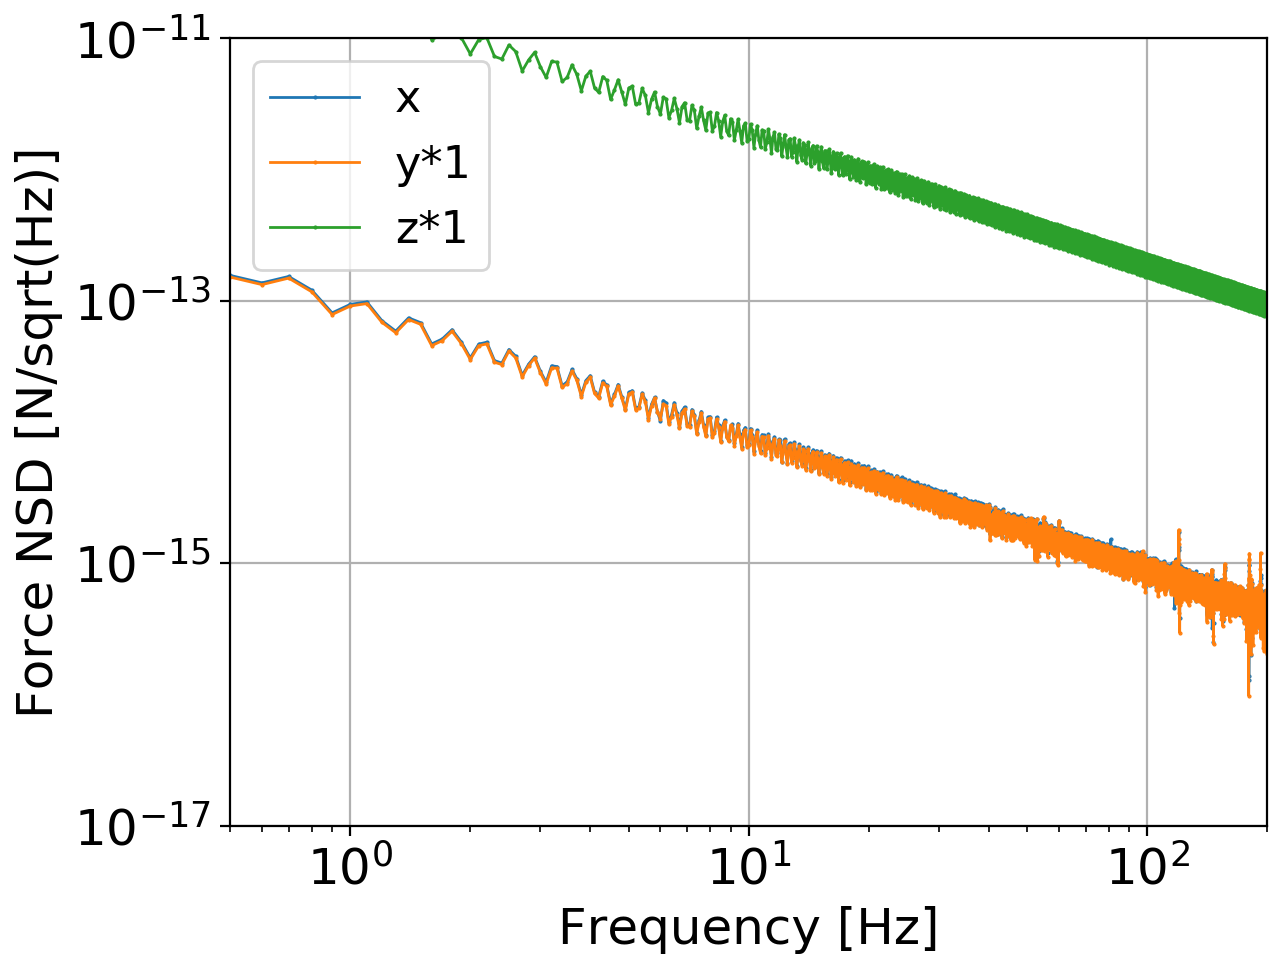

In [39]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.99, top=0.96, bottom=0.14)
ax.loglog(freqs, xfnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, yfnsd, '.-', label="y*1",markersize=1,linewidth=1)
ax.loglog(freqs, zfnsd, '.-', label="z*1",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/sqrt(Hz)]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(0.5,200)
plt.ylim(1e-17,1e-11)
plt.grid(True)
#ofname='/home/data_transfer/data_from_windows/20191014/Bead1/InitialTest/DataFNSD%d_300dpi.png' % Ndata
#ofname='/home/data_transfer/data_from_windows/20200203/Bead1/NoiseCharacterization/Discharge%d.png' % Ndata
#ofname='/data/new_trap/20200207/Bead1/TransFunc/TransFunc_Z_%d.png' % Ndata
ofname='/data/new_trap/20200210/Bead2/Shaking/Shaking%d/Shaking%d_%dXYZ2.png' % (Dx,Nshake,Ndata)
#ofname='/home/data_transfer/data_from_windows/20200210/Bead2/Shaking/Shaking%d/Test%d_%d.png' % (Dx,Nshake,Ndata)

plt.savefig(ofname,dpi=300)

In [41]:
##Code to get 10 noise data
start_time = time.time()

#DefineParameters
Nint=0
Ndata=3
Dx=384
Fshake=3
DataN=16000
HarmN=20
Noff=7
ArraySize=(DataN,HarmN)

DataSpaceXNoi1Amp=np.zeros(ArraySize)
DataSpaceYNoi1Amp=np.zeros(ArraySize)
DataSpaceZNoi1Amp=np.zeros(ArraySize)
DataSpaceXNoi1Pha=np.zeros(ArraySize)
DataSpaceYNoi1Pha=np.zeros(ArraySize)
DataSpaceZNoi1Pha=np.zeros(ArraySize)

DataSpaceXNoi2Amp=np.zeros(ArraySize)
DataSpaceYNoi2Amp=np.zeros(ArraySize)
DataSpaceZNoi2Amp=np.zeros(ArraySize)
DataSpaceXNoi2Pha=np.zeros(ArraySize)
DataSpaceYNoi2Pha=np.zeros(ArraySize)
DataSpaceZNoi2Pha=np.zeros(ArraySize)

DataSpaceXNoi3Amp=np.zeros(ArraySize)
DataSpaceYNoi3Amp=np.zeros(ArraySize)
DataSpaceZNoi3Amp=np.zeros(ArraySize)
DataSpaceXNoi3Pha=np.zeros(ArraySize)
DataSpaceYNoi3Pha=np.zeros(ArraySize)
DataSpaceZNoi3Pha=np.zeros(ArraySize)

DataSpaceXNoi4Amp=np.zeros(ArraySize)
DataSpaceYNoi4Amp=np.zeros(ArraySize)
DataSpaceZNoi4Amp=np.zeros(ArraySize)
DataSpaceXNoi4Pha=np.zeros(ArraySize)
DataSpaceYNoi4Pha=np.zeros(ArraySize)
DataSpaceZNoi4Pha=np.zeros(ArraySize)

DataSpaceXNoi5Amp=np.zeros(ArraySize)
DataSpaceYNoi5Amp=np.zeros(ArraySize)
DataSpaceZNoi5Amp=np.zeros(ArraySize)
DataSpaceXNoi5Pha=np.zeros(ArraySize)
DataSpaceYNoi5Pha=np.zeros(ArraySize)
DataSpaceZNoi5Pha=np.zeros(ArraySize)

DataSpaceXNoi6Amp=np.zeros(ArraySize)
DataSpaceYNoi6Amp=np.zeros(ArraySize)
DataSpaceZNoi6Amp=np.zeros(ArraySize)
DataSpaceXNoi6Pha=np.zeros(ArraySize)
DataSpaceYNoi6Pha=np.zeros(ArraySize)
DataSpaceZNoi6Pha=np.zeros(ArraySize)

DataSpaceXNoi7Amp=np.zeros(ArraySize)
DataSpaceYNoi7Amp=np.zeros(ArraySize)
DataSpaceZNoi7Amp=np.zeros(ArraySize)
DataSpaceXNoi7Pha=np.zeros(ArraySize)
DataSpaceYNoi7Pha=np.zeros(ArraySize)
DataSpaceZNoi7Pha=np.zeros(ArraySize)

DataSpaceXNoi8Amp=np.zeros(ArraySize)
DataSpaceYNoi8Amp=np.zeros(ArraySize)
DataSpaceZNoi8Amp=np.zeros(ArraySize)
DataSpaceXNoi8Pha=np.zeros(ArraySize)
DataSpaceYNoi8Pha=np.zeros(ArraySize)
DataSpaceZNoi8Pha=np.zeros(ArraySize)

DataSpaceXNoi9Amp=np.zeros(ArraySize)
DataSpaceYNoi9Amp=np.zeros(ArraySize)
DataSpaceZNoi9Amp=np.zeros(ArraySize)
DataSpaceXNoi9Pha=np.zeros(ArraySize)
DataSpaceYNoi9Pha=np.zeros(ArraySize)
DataSpaceZNoi9Pha=np.zeros(ArraySize)

DataSpaceXNoi10Amp=np.zeros(ArraySize)
DataSpaceYNoi10Amp=np.zeros(ArraySize)
DataSpaceZNoi10Amp=np.zeros(ArraySize)
DataSpaceXNoi10Pha=np.zeros(ArraySize)
DataSpaceYNoi10Pha=np.zeros(ArraySize)
DataSpaceZNoi10Pha=np.zeros(ArraySize)

for k in range(0,DataN):
##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(25000)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

##save signal bin data to the array
#save noise bin data to the array
    for i in range(1,(HarmN+1)):
        Noff=-5
        DataSpaceXNoi1Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi1Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi1Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi1Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi1Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi1Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
        Noff=-4
        DataSpaceXNoi2Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi2Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi2Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi2Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi2Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi2Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
        Noff=-3
        DataSpaceXNoi3Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi3Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi3Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi3Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi3Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi3Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
        Noff=-2
        DataSpaceXNoi4Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi4Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi4Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi4Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi4Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi4Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
        Noff=-1
        DataSpaceXNoi5Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi5Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi5Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi5Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi5Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi5Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
        Noff=1
        DataSpaceXNoi6Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi6Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi6Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi6Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi6Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi6Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
        Noff=2
        DataSpaceXNoi7Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi7Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi7Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi7Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi7Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi7Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
        Noff=3
        DataSpaceXNoi8Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi8Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi8Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi8Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi8Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi8Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
        Noff=4
        DataSpaceXNoi9Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi9Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi9Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi9Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi9Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi9Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
        Noff=5
        DataSpaceXNoi10Amp[k][i-1]=xnsd[Fshake*10*i-Noff]
        DataSpaceXNoi10Pha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoi10Amp[k][i-1]=ynsd[Fshake*10*i-Noff]
        DataSpaceYNoi10Pha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoi10Amp[k][i-1]=znsd[Fshake*10*i-Noff]
        DataSpaceZNoi10Pha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
    if (k%100)==0:
        print(k)
        
##write the harmonics data
for i in range(1,(HarmN+1)):
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise-5%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi1Amp[k][i-1], DataSpaceYNoi1Amp[k][i-1], DataSpaceZNoi1Amp[k][i-1], 
                                            DataSpaceXNoi1Pha[k][i-1], DataSpaceYNoi1Pha[k][i-1], DataSpaceZNoi1Pha[k][i-1]))
    f1.close()
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise-4%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi2Amp[k][i-1], DataSpaceYNoi2Amp[k][i-1], DataSpaceZNoi2Amp[k][i-1], 
                                            DataSpaceXNoi2Pha[k][i-1], DataSpaceYNoi2Pha[k][i-1], DataSpaceZNoi2Pha[k][i-1]))
    f1.close()
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise-3%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi3Amp[k][i-1], DataSpaceYNoi3Amp[k][i-1], DataSpaceZNoi3Amp[k][i-1], 
                                            DataSpaceXNoi3Pha[k][i-1], DataSpaceYNoi3Pha[k][i-1], DataSpaceZNoi3Pha[k][i-1]))
    f1.close()
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise-2%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi4Amp[k][i-1], DataSpaceYNoi4Amp[k][i-1], DataSpaceZNoi4Amp[k][i-1], 
                                            DataSpaceXNoi4Pha[k][i-1], DataSpaceYNoi4Pha[k][i-1], DataSpaceZNoi4Pha[k][i-1]))
    f1.close()
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise-1%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi5Amp[k][i-1], DataSpaceYNoi5Amp[k][i-1], DataSpaceZNoi5Amp[k][i-1], 
                                            DataSpaceXNoi5Pha[k][i-1], DataSpaceYNoi5Pha[k][i-1], DataSpaceZNoi5Pha[k][i-1]))
    f1.close()
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise+1%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi6Amp[k][i-1], DataSpaceYNoi6Amp[k][i-1], DataSpaceZNoi6Amp[k][i-1], 
                                            DataSpaceXNoi6Pha[k][i-1], DataSpaceYNoi6Pha[k][i-1], DataSpaceZNoi6Pha[k][i-1]))
    f1.close()
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise+2%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi7Amp[k][i-1], DataSpaceYNoi7Amp[k][i-1], DataSpaceZNoi7Amp[k][i-1], 
                                            DataSpaceXNoi7Pha[k][i-1], DataSpaceYNoi7Pha[k][i-1], DataSpaceZNoi7Pha[k][i-1]))
    f1.close()
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise+3%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi8Amp[k][i-1], DataSpaceYNoi8Amp[k][i-1], DataSpaceZNoi8Amp[k][i-1], 
                                            DataSpaceXNoi8Pha[k][i-1], DataSpaceYNoi8Pha[k][i-1], DataSpaceZNoi8Pha[k][i-1]))
    f1.close()
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise+4%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi9Amp[k][i-1], DataSpaceYNoi9Amp[k][i-1], DataSpaceZNoi9Amp[k][i-1], 
                                            DataSpaceXNoi9Pha[k][i-1], DataSpaceYNoi9Pha[k][i-1], DataSpaceZNoi9Pha[k][i-1]))
    f1.close()
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise+5%d_%d_%dthHarm.txt" % (Dx,Dx,Ndata,i)
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoi10Amp[k][i-1], DataSpaceYNoi10Amp[k][i-1], DataSpaceZNoi10Amp[k][i-1], 
                                            DataSpaceXNoi10Pha[k][i-1], DataSpaceYNoi10Pha[k][i-1], DataSpaceZNoi10Pha[k][i-1]))
    f1.close()
    
print ("Total run time is ", time.time() - start_time, " s")


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
Total run time is  582.5065748691559  s


In [ ]:
Z